## 유방암 데이터 분석

In [128]:
!pip install mglearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

plt.rcParams['axes.unicode_minus'] = False

In [ ]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
print(cancer.DESCR)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

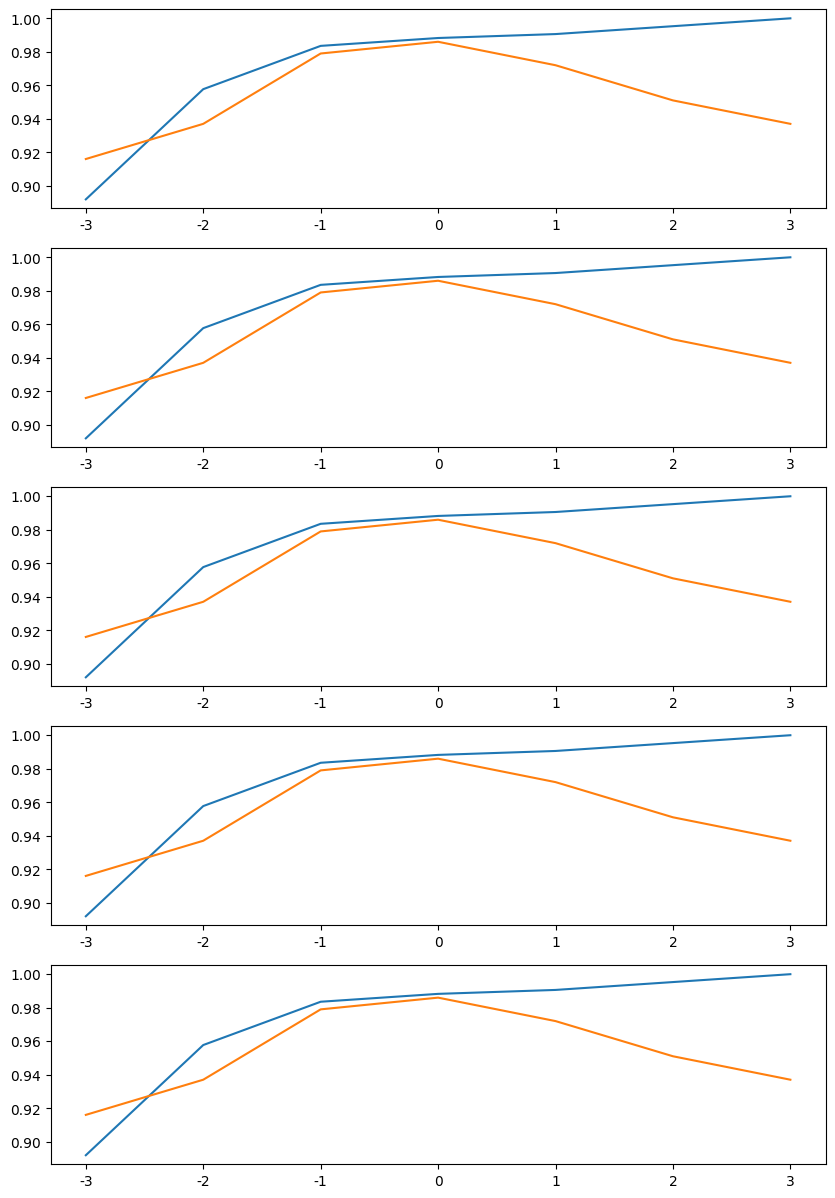

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=42, stratify = cancer.target)

ss = StandardScaler()

X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

it_list = [100, 200, 300, 400, 500]
C_list = [0.001, 0.01, 0.1, 1, 10, 100, 1000]

fig, axes = plt.subplots(nrows=len(it_list), figsize=(10, 15))

for idx, b in enumerate(it_list) :
    train_list = []
    test_list = []
    for a in C_list :
        lr = LogisticRegression(C=a, max_iter=b)
        lr.fit(X_train,y_train)
        train_list.append(lr.score(X_train,y_train))
        test_list.append(lr.score(X_test,y_test))
    axes[idx].plot(np.log10(C_list), train_list)
    axes[idx].plot(np.log10(C_list), test_list)
plt.show()


In [ ]:
lr = LogisticRegression(C=1, max_iter= 100)
lr.fit(X_train,y_train)
train_list.append(lr.score(X_train,y_train))
test_list.append(lr.score(X_test,y_test))

print(lr.score(X_train, y_train), lr.score(X_test, y_test))


0.9882629107981221 0.986013986013986


In [ ]:
# 예측확률이 낮은 애는 knn 모델로 돌려보기
proba1 = lr.predict_proba(X_train)
proba2 = lr.predict_proba(X_test)
a1 = np.round(proba1, 3)
a2 = np.round(proba2, 3)
b1 = np.max(a1, axis=1)
b2 = np.max(a2, axis=1)
b1[b1<0.7]

array([0.696, 0.69 , 0.617, 0.587, 0.641, 0.669, 0.607, 0.656, 0.594,
       0.633, 0.662, 0.607])

In [ ]:
find = b1[b1<0.7]
indices = [np.where(b1 == value)[0][0] if value in b1 else None for value in find]
indices

[33, 139, 162, 169, 177, 225, 261, 276, 288, 334, 337, 261]

In [ ]:
result = knn.predict(X_train[indices])
prec = lr.predict(X_train)
prec[[indices]] = result

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(prec, y_train)

0.9835680751173709

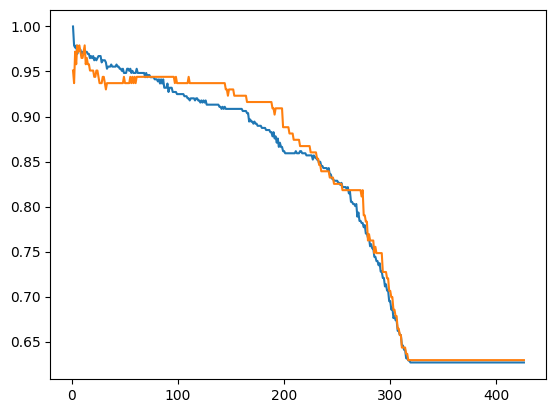

In [ ]:
# knn
from sklearn.neighbors import KNeighborsClassifier

idx = list(range(1,427))
train_list = []
test_list =[]

for i in idx :
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    train_list.append(knn.score(X_train,y_train))
    test_list.append(knn.score(X_test,y_test))

plt.plot(idx, train_list)
plt.plot(idx, test_list)
plt.show()


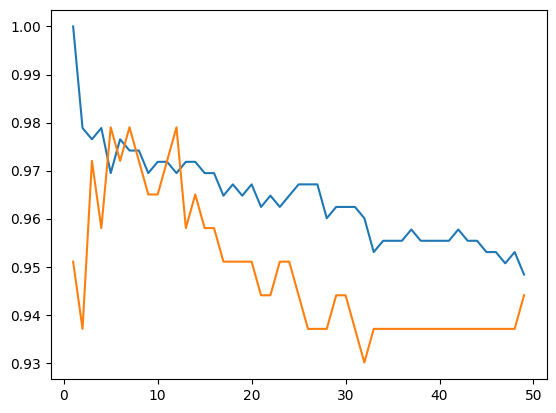

In [ ]:
# knn
from sklearn.neighbors import KNeighborsClassifier

idx = list(range(1,50))
train_list = []
test_list =[]

for i in idx :
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    train_list.append(knn.score(X_train,y_train))
    test_list.append(knn.score(X_test,y_test))

plt.plot(idx, train_list)
plt.plot(idx, test_list)
plt.show()


In [ ]:
knn = KNeighborsClassifier(n_neighbors = 7)
knn.fit(X_train,y_train)
print(knn.score(X_train,y_train))
print(knn.score(X_test,y_test))

0.9741784037558685
0.9790209790209791


## IRIS 데이터 분석

In [ ]:
from sklearn.datasets import load_iris
iris = load_iris()

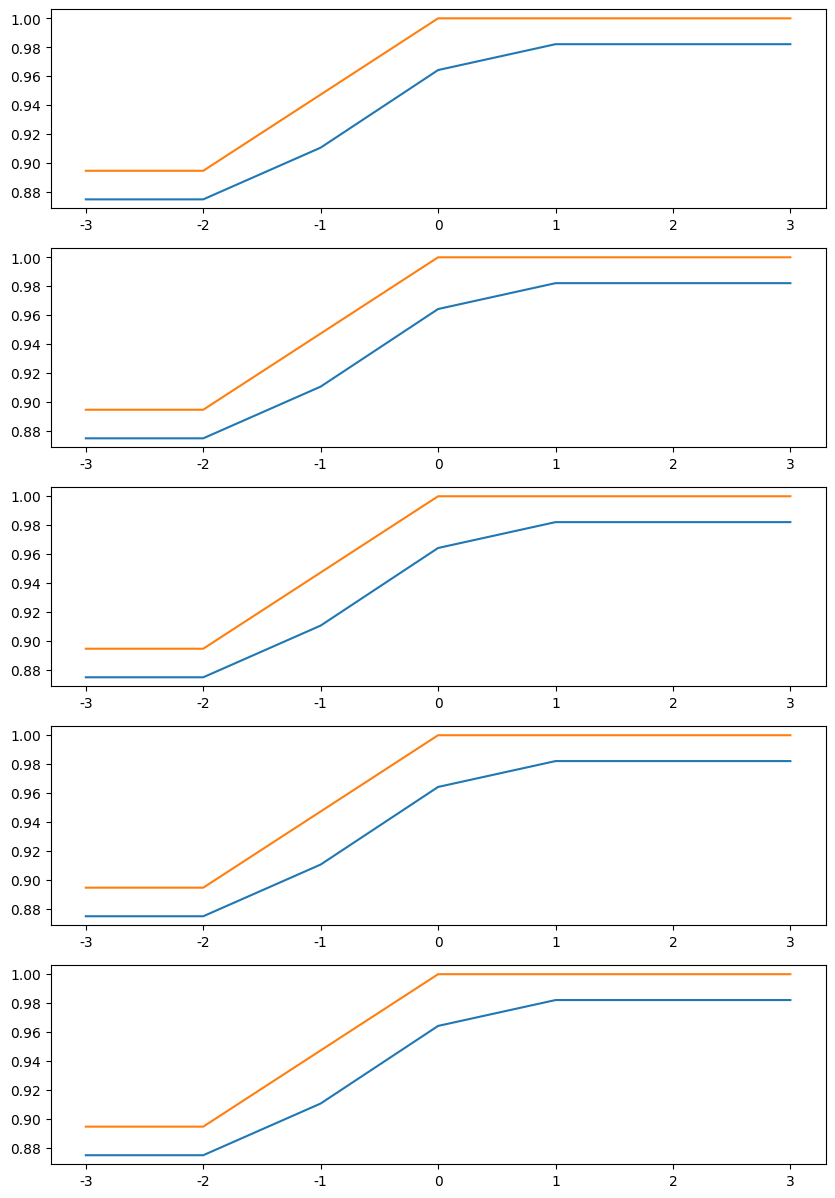

In [ ]:
# 로지스틱 회귀
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=42)

ss = StandardScaler()

X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

it_list = [100, 200, 300, 400, 500]
C_list = [0.001, 0.01, 0.1, 1, 10, 100, 1000]

fig, axes = plt.subplots(nrows=len(it_list), figsize=(10, 15))

for idx, b in enumerate(it_list) :
    train_list = []
    test_list = []
    for a in C_list :
        lr = LogisticRegression(C=a, max_iter=b)
        lr.fit(X_train,y_train)
        train_list.append(lr.score(X_train,y_train))
        test_list.append(lr.score(X_test,y_test))
    axes[idx].plot(np.log10(C_list), train_list)
    axes[idx].plot(np.log10(C_list), test_list)
plt.show()


In [ ]:
lr = LogisticRegression(C=10, max_iter= 100)
lr.fit(X_train,y_train)
train_list.append(lr.score(X_train,y_train))
test_list.append(lr.score(X_test,y_test))

print(lr.score(X_train, y_train), lr.score(X_test, y_test))

0.9821428571428571 1.0


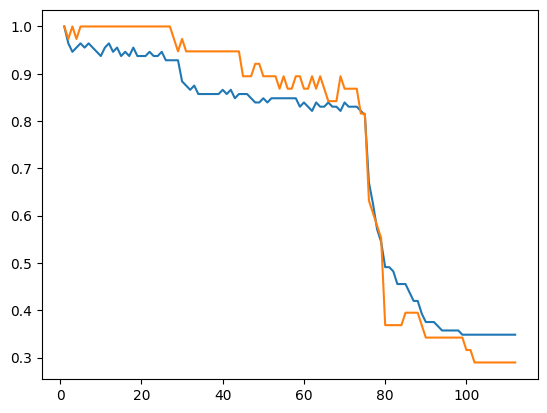

In [ ]:
# knn
from sklearn.neighbors import KNeighborsClassifier

idx = list(range(1,113))
train_list = []
test_list =[]

for i in idx :
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    train_list.append(knn.score(X_train,y_train))
    test_list.append(knn.score(X_test,y_test))

plt.plot(idx, train_list)
plt.plot(idx, test_list)
plt.show()


In [ ]:
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train,y_train)
print(knn.score(X_train,y_train))
print(knn.score(X_test,y_test))

1.0
1.0
